<a href="https://colab.research.google.com/github/jp0utside/Math-152/blob/main/Random_Walk_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ideas


*   Have random walks using circular coordinates, lines can either go along the circumference of the circle or travel inward toward the radius (matplotlib)
*   Have program start in upper left and create rule for how x and y are determined (probably generating a 6 coefficents for x and y, and then creating equations for how the image will change as the coordinates do)




In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def circle_walk(n = 360, t = 100):
  rads = np.linspace(0, 2*np.pi, n)
  walks = np.zeros((2, n, t))
  walks[:, :, 0] = (np.cos(rads), np.sin(rads))
  rad_step = 1/n
  deg_step = (2*np.pi)/n
  for i in range(1, t):
    for j in range(n):
      sign = np.random.choice([-1, 1])
      dim = np.random.choice([rad_step, deg_step])
      walks[0,j,i] = walks[0,j,i-1] + sign*(np.cos(dim))
      walks[1,j,i] = walks[1,j,i-1] + sign*(np.sin(dim))
  return walks
  #walks = np.vstack((np.cos(rads), np.sin(rads))).T
  #walks.reshape()
    
walks = circle_walk()

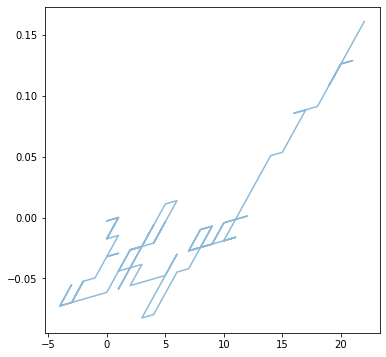

[[ 1.00000000e+00  3.85802221e-06  1.00000000e+00]
 [ 0.00000000e+00 -2.77777421e-03  0.00000000e+00]]


In [ ]:
plt.figure(figsize=(6,6))
#plt.scatter(walks[0,:,3], walks[1,:,3], s = 6)
for i in range(1):
  plt.plot(walks[0,i,:], walks[1,i,:], alpha = 0.5)
plt.show()
print(walks[:,0,:3])